Importiert unterstützende Libraries in das Jupyter Notebook und legt Pfad für MLD fest.

In [2]:
import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import shutil
import sys
sys.path.append("./mld/src")
import midlevel_descriptors as mld

Legt die Arbeitsumgebung fest - wo die Dateien gesucht bzw. abgelegt werden sollen. Hier ist es wichtig, da wir dort unsere Pickle-Dateien aus dem add-annotations-Notebook reingelegt haben, damit wir diese hier vergleichen können.

In [3]:
in_directory = 'Annotations/'

Durch diesen Befehl werden alle WAV-Files in ein Directory kopiert um sich die Arbeit zu erleichtern. Aus dem Ordner 'processed' in den Ordner 'all_wavs'. Wichtig ist hierbei der rglob-Befehl, welchen wir mit 'from pathlib import Path' importiert haben. Somit funktioniert es mit allen WAV-Files. Auch wenn dies natürlich mit anderen Befehlen ebenso funktioniert, sucht der rglob-Befehl alle WAV-Files auch in den Unterordnern und ist somit sehr exakt. Somit werden alle WAV-Files mit dem 'shutil.copy2'-Befehl in das Zielverzeichnis kopiert.

In [4]:
# copy all wav files to one directory
wav_sources = 'processed/'
wav_target = 'all_wavs'
for file in Path(wav_sources).rglob('*.wav'):
    if os.path.isfile(file):
        shutil.copy2(file, wav_target)

Bei der Pickle-Datei von Frau Orschulik gab es immer wieder Errors. Vermutlich liegt es daran, dass Frau Orschulik eine andere Major-Version - zumindest aber eine andere Version von Panda hat. Dementsprechend kann man davon ausgehen, dass es Inkompatibilitätsprobleme geben könnte und dementsprechend der Code anderswo nicht funktionieren kann.
Dementsprechend wurde hier der Original-Ordner von Frau Orschulik gewählt (ihre Pickle-Datei) und der Code wurde nochmal separat für diese Annotation geschrieben und schlussendlich in eine neue Pickle-Datei geschrieben.

In [5]:
# Fix pandas error with Orschulik df
df_q = pd.read_pickle('./processed/Orschulik/Orschulik_mdf.pkl')
def re_arrange_df(df, audio_dir):
    df['segmented_file'] = df['segmented_file'].apply(lambda x: audio_dir+os.path.basename(x))
    df = df.set_index(df.segmented_file)
    df = df.drop(columns=['segmented_file', 'channel'])
    return df
df_q = re_arrange_df(df_q, 'all_wavs/')

ad ={'id':'Q-Stimme', 
     'gender': 'divers', 
     'speakertype': 'synthetic',
     'age': 35, 
     'lang':'en-GB', 
     'speechtype':'synthetic',
     'source':'https://www.genderlessvoice.com/'}
for k in ad:
    df_q[k] = ad[k]
df_q.to_pickle('Annotations/q.pkl')

df_q.head()

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/Q-Stimme_Orschulik_seg_00000000.wav,Q-Stimme,divers,synthetic,35,en-GB,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000001.wav,Q-Stimme,divers,synthetic,35,en-GB,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000002.wav,Q-Stimme,divers,synthetic,35,en-GB,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000003.wav,Q-Stimme,divers,synthetic,35,en-GB,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000004.wav,Q-Stimme,divers,synthetic,35,en-GB,synthetic,https://www.genderlessvoice.com/


Bei Frau Wannenmacher stand ein Apt vor dem eigentlichen Dateinamen. Somit gab es vorher eine Fehlermeldung.
Durch diesen Befehl wurde die Pickle-Datei geladen. Dann wurde anschließend der Index geändert. Schlussendlich wurde die pickle-Datei dann wieder zurück geschrieben bzw. überschrieben. Die 3: im lambda-Befehl steht dafür, dass erst ab dem vierten Zeichen der eigentliche Dateinamen los geht. Es werden also vorher drei Zeichen übersprungen.

In [6]:
# Fix file path with Wannenmacher df
df_wannenmacher = pd.read_pickle('./Annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./Annotations/Apt.pkl')

Mit diesem Befehl wird der Datenframe erzeugt. Dieser sollte einfach durchlaufen. Durch die Fehlermeldungen bei Frau Orschulik und Frau Wannenmacher läuft dieser allerdings nicht durch. Deshalb wurden die Code-Lines, welche Frau Wannenmacher und Frau Orschulik betreffen, nachträglich vor diesen Befehl verschoben.
Dataframe wird initialisiert. Es wird festgelegt, wo die Audio-Dateien sich befinden.

Wichtig: Einige Teilnehmende hatten eine column namens 'sex' drin. Prinzipiell sollte diese aber 'gender' heißen. Dementsprechend wurden mit dem try / except-Befehl falls  die 'sex'-Spalte vorkam, die Inhalte in die 'gender'-Spalte kopiert und abschließend die 'sex'-Spalte gelöscht.

In [7]:
df = pd.DataFrame()
audio_directory = 'all_wavs/'
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    try:
        df_tmp['gender'] = df_tmp.sex
        df_tmp = df_tmp.drop(columns=['sex'])
    except (KeyError, AttributeError) as e:
        pass
    df_tmp.index = df_tmp.index.to_series().apply(lambda x: audio_directory+os.path.basename(x))
    df = df.append(df_tmp)

Annotations\alexa.pkl
Annotations\amthor.pkl
Annotations\Apt.pkl
Annotations\bartsch.pkl
Annotations\Drosten.pkl
Annotations\geliebte_anno.pkl
Annotations\king.pkl
Annotations\obama.pkl
Annotations\q.pkl
Annotations\schumacher.pkl
Annotations\thunberg.pkl


Gibt die 'uniquen' ID-Werte aus. In diesem Fall dann deren Datei-Namen. In unserem Fall die Namen der Sprecher/innen.
Auch ein möglicher Befehl hierzu wäre: df['id'].unique()

In [8]:
df.id.unique()

array(['alexa', 'philipp.amthor', 'Daniel_Apt', 'dietmar_bartsch',
       'Drosten', 'hildegard_knef', 'martin_luther_king',
       'michelle_obama', 'Q-Stimme', 'hajo_schumacher', 'greta_thunberg'],
      dtype=object)

Import mittels IPython ein Audio-Segment der gewählten Rede von Frau Haubenreiser.

In [9]:
import IPython
IPython.display.Audio('all_wavs/Die-Geliebte_Haubereiser_seg_00000039.wav')

Gibt Zeilen- und Spaltenanzahl der gelesenen Datei aus.

In [10]:
df.shape

(794, 7)

Zeigt die erste Zeile des eingelesenen Dataframes an. Die Zahl in Klammern variiert die Zeilenanzahl.

In [11]:
df.head(1)

,id,age,speechtype,lang,source,speakertype,gender
segmented_file,,,,,,,
all_wavs/Alexa_Seyfried_seg_00000000.wav,alexa,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic,female


Hier werden die uniquen Gender angezeigt.

In [12]:
df.gender.unique()

array(['female', 'male', 'divers'], dtype=object)

Extrahierung der Mid-Level-Descriptors.

In [13]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df, cache_path='./tmp/alldf_mld_cache/cache')

Grafische Visualisierung der Speechtypes und anschließend der Speakertypes als Kuchendiagramm.

<AxesSubplot:ylabel='speechtype'>

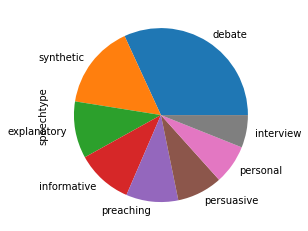

In [14]:
df.speechtype.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='speakertype'>

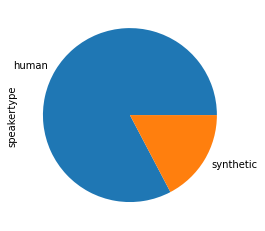

In [15]:
df.speakertype.value_counts().plot(kind='pie')

Mit dieser Funktion werden zwei neue Dataframes erstellt. df_preach und df_debate. Diese wurden damit gefiltert, dass im df_preach nur Daten mit dem df.speechtype 'preaching' vor kommen und in dem df_debate nur Daten mit dem df.speechtype 'debate'.

In [16]:
df_preach = df[df.speechtype=='preaching']
df_debate = df[df.speechtype=='debate']

Diese Funktion gibt die Features aus, welche sich ausschließlich auf die jeweilig oben genannten Dataframes beziehen. Also nur auf diese mit dem df.speechtype 'preaching' und / oder diese mit dem df.speechtype 'debate'.

In [17]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats(df_preach)
feats_debate = get_feats(df_debate)

Gibt Zeilen- und Spaltenanzahl der gelesenen Datei aus.

In [18]:
feats_preach.shape

(77, 580)

Plottet die Speechtypes 'preach' und 'debate' nach ihrer Sprechrate als Boxplot. Als Ergebnis können wir interpretieren, dass die Sprechrate beim Debattieren höher bzw. schneller ist als beim Predigen.

<AxesSubplot:>

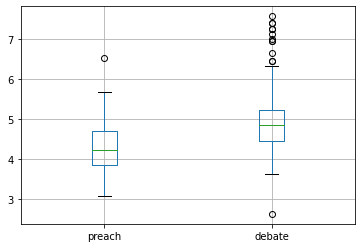

In [19]:
pd.concat([feats_preach['hld_sylRate'].rename('preach'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()

Einige grafische Repräsentationen als Eigenleistung.

<AxesSubplot:>

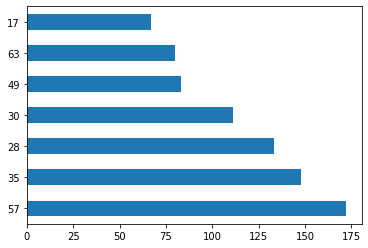

In [20]:
df.age.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='speechtype', ylabel='gender'>

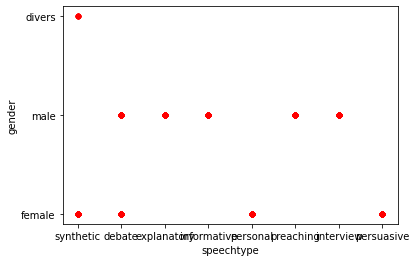

In [21]:
df.plot.scatter(y='gender', x='speechtype', c='red')

In [22]:
df_interview = df[df.speechtype=='interview']
df_personal = df[df.speechtype=='personal']

In [23]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats(df_interview)
feats_debate = get_feats(df_personal)

<AxesSubplot:>

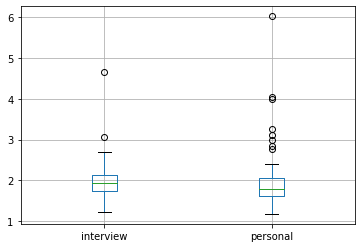

In [24]:
pd.concat([feats_preach['lld_voicingFinalUnclipped_sma_q_kurtosis'].rename('interview'), 
           feats_debate['lld_voicingFinalUnclipped_sma_q_kurtosis'].rename('personal')], axis=1).boxplot()